# Predict Melbourne house price and use regularization techniques to avoid overfitting

In [1]:
#importing basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the dataset and store it in a user-defined variable --> df

df=pd.read_csv('melb_data.csv')

In [3]:
df.shape

(13580, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  int64  
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  int64  
 10  Bedroom2       13580 non-null  int64  
 11  Bathroom       13580 non-null  int64  
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  int64  
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [5]:
#show all rows and columns
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [6]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,3067,2,1,1.0,202,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,04/02/2016,2.5,3067,2,1,0.0,156,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,04/03/2017,2.5,3067,3,2,0.0,134,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,04/03/2017,2.5,3067,3,2,1.0,94,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,04/06/2016,2.5,3067,3,1,2.0,120,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019


In [7]:
#checking null values

df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [8]:
#calculate percentage of null values

null_var=df.isnull().sum()/df.shape[0]*100
null_var

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price             0.000000
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.000000
Postcode          0.000000
Bedroom2          0.000000
Bathroom          0.000000
Car               0.456554
Landsize          0.000000
BuildingArea     47.496318
YearBuilt        39.580265
CouncilArea      10.081001
Lattitude         0.000000
Longtitude        0.000000
Regionname        0.000000
Propertycount     0.000000
dtype: float64

In [9]:
r=df.isnull().sum(axis=0)          #check  null values in row   
r

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [10]:
row=r*100/df.shape[0]                         #percentage of null values in row
row

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price             0.000000
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.000000
Postcode          0.000000
Bedroom2          0.000000
Bathroom          0.000000
Car               0.456554
Landsize          0.000000
BuildingArea     47.496318
YearBuilt        39.580265
CouncilArea      10.081001
Lattitude         0.000000
Longtitude        0.000000
Regionname        0.000000
Propertycount     0.000000
dtype: float64

In [11]:
#since BuildingArea, YearBuilt have more than 20-30% of null values, it can be deleted  
#Car --> this column to be filled with mean 
#since the row percentage of councilarea column is 10% which is more than 5% , dropping the rows of councilarea

In [12]:
#retrieve those columns whose percentage of null values >20-30%

#drop_columns=null_var[null_var>20].keys()                         #keys is used to pick columns
#drop_columns

In [13]:
#delete columns which has null values stored in -->drop_columns

#df_drop_col=df.drop(columns=drop_columns)
#df_drop_col.shape                                                #2 columns deleted

In [14]:
df_drop_col=df.dropna(subset=['BuildingArea','YearBuilt'])

In [15]:
df_drop_col.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,04/02/2016,2.5,3067,2,1,0.0,156,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,04/03/2017,2.5,3067,3,2,0.0,134,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,04/06/2016,2.5,3067,3,1,2.0,120,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019
6,Abbotsford,124 Yarra St,3,h,1876000,S,Nelson,07/05/2016,2.5,3067,4,2,0.0,245,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019
7,Abbotsford,98 Charles St,2,h,1636000,S,Nelson,8/10/2016,2.5,3067,2,1,2.0,256,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019


In [16]:
#filling the null values with the mean of it-- CAR column

df_drop_col['Car'].fillna(df_drop_col['Car'].mean(),inplace=True)

In [17]:
df_drop_col['Car']

1         0.000000
2         0.000000
4         2.000000
6         0.000000
7         2.000000
9         2.000000
11        2.000000
12        1.000000
15        2.000000
16        1.000000
17        1.000000
19        1.000000
20        2.000000
23        1.000000
24        1.000000
25        0.000000
27        1.000000
29        2.000000
32        1.000000
33        1.000000
34        0.000000
35        1.000000
36        0.000000
37        1.000000
38        1.000000
39        1.000000
40        1.000000
41        1.000000
42        2.000000
43        1.000000
44        1.000000
47        2.000000
48        1.000000
49        1.000000
50        1.000000
51        6.000000
52        1.000000
53        1.000000
56        2.000000
57        2.000000
60        1.000000
61        5.000000
63        4.000000
64        2.000000
65        2.000000
67        1.000000
68        1.000000
69        1.000000
77        3.000000
78        0.000000
80        0.000000
81        0.000000
82        0.

In [18]:
df_drop_col.shape

(6858, 21)

In [19]:
#CouncilArea column
df=df_drop_col.dropna()

In [20]:
#checking the shape after null values dropped
df.shape

(6196, 21)

In [21]:
#checking null values dropped
df['CouncilArea']

1                    Yarra
2                    Yarra
4                    Yarra
6                    Yarra
7                    Yarra
9                    Yarra
11                   Yarra
12                   Yarra
15                   Yarra
16                   Yarra
17                   Yarra
19                   Yarra
20                   Yarra
23                   Yarra
24                   Yarra
25                   Yarra
27                   Yarra
29                   Yarra
32                   Yarra
33                   Yarra
34                   Yarra
35                   Yarra
36                   Yarra
37                   Yarra
38           Moonee Valley
39           Moonee Valley
40           Moonee Valley
41           Moonee Valley
42           Moonee Valley
43           Moonee Valley
44           Moonee Valley
47           Moonee Valley
48           Moonee Valley
49           Moonee Valley
50           Moonee Valley
51           Moonee Valley
52           Moonee Valley
5

In [22]:
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

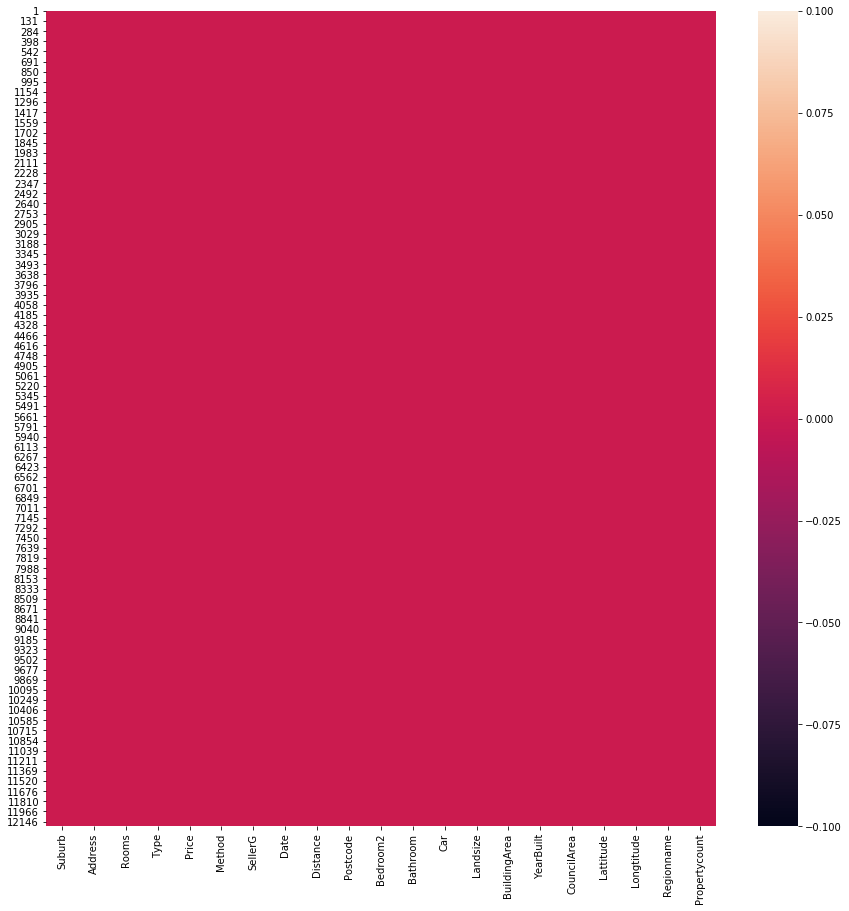

In [23]:
#plot heatmap after deleting null value columns

plt.figure(figsize=(15,15))
sns.heatmap(df.isnull())             #used df as dataset to plot heatmap bcoz it has deleted null columns
plt.show()

In [24]:
df.corr()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.533505,0.283885,0.051237,0.951793,0.613853,0.422526,0.098755,0.608215,-0.068122,0.016049,0.088031,-0.111422
Price,0.533505,1.000000,-0.148867,0.125539,0.514561,0.503922,0.261507,0.081419,0.530574,-0.304633,-0.213574,0.211760,-0.046410
Distance,0.283885,-0.148867,1.000000,0.405729,0.290242,0.124530,0.273615,0.059369,0.159603,0.246291,-0.094494,0.221861,-0.083969
Postcode,0.051237,0.125539,0.405729,1.000000,0.053770,0.109804,0.043713,0.025807,0.078483,0.024375,-0.425172,0.471305,0.064534
Bedroom2,0.951793,0.514561,0.290242,0.053770,1.000000,0.617751,0.425726,0.097172,0.593000,-0.056343,0.021309,0.085895,-0.109401
Bathroom,0.613853,0.503922,0.124530,0.109804,0.617751,1.000000,0.340808,0.076295,0.534425,0.157820,-0.072020,0.116103,-0.067126
Car,0.422526,0.261507,0.273615,0.043713,0.425726,0.340808,1.000000,0.117647,0.334282,0.108714,0.011973,0.054699,-0.046487
Landsize,0.098755,0.081419,0.059369,0.025807,0.097172,0.076295,0.117647,1.000000,0.084825,0.026518,0.005610,0.032918,-0.017784
BuildingArea,0.608215,0.530574,0.159603,0.078483,0.593000,0.534425,0.334282,0.084825,1.000000,0.005836,-0.037904,0.103613,-0.066144
YearBuilt,-0.068122,-0.304633,0.246291,0.024375,-0.056343,0.157820,0.108714,0.026518,0.005836,1.000000,0.057108,-0.002114,-0.000797


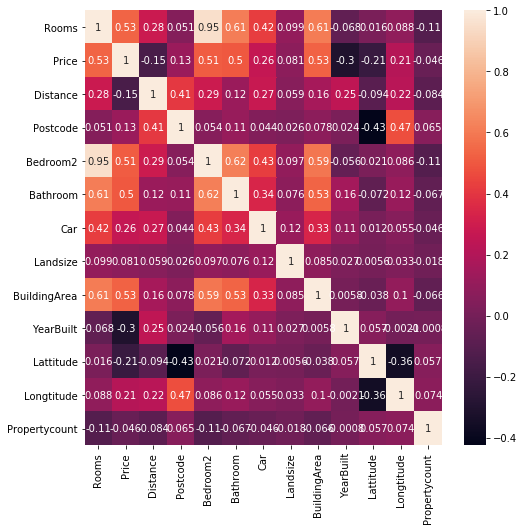

In [25]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)             #used df as dataset to plot heatmap bcoz it has deleted null columns
plt.show()

In [26]:
#BEDROOM 2 feature to be removed as it has multicolinearity with rooms

# LABEL ENCODING

In [27]:
#APPLYING LABEL ENCODING ON CATEGORICAL DATA
df_cat=df.select_dtypes(object)
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6196 entries, 1 to 12212
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Suburb       6196 non-null   object
 1   Address      6196 non-null   object
 2   Type         6196 non-null   object
 3   Method       6196 non-null   object
 4   SellerG      6196 non-null   object
 5   Date         6196 non-null   object
 6   CouncilArea  6196 non-null   object
 7   Regionname   6196 non-null   object
dtypes: object(8)
memory usage: 435.7+ KB


In [28]:
from sklearn.preprocessing import LabelEncoder

#using for loop to get all rows label together using fit_transform function
for col in df_cat:
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])

In [29]:
#checking the output of for loop
df_cat.head()

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
1,0,2790,0,1,18,3,29,2
2,0,4520,0,3,18,4,29,2
4,0,4882,0,4,112,5,29,2
6,0,1027,0,1,112,8,29,2
7,0,6101,0,1,112,50,29,2


In [30]:
df_num=df.select_dtypes(['int64','float64'])
df_num.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
1,2,1035000,2.5,3067,2,1,0.0,156,79.0,1900.0,-37.8079,144.9934,4019
2,3,1465000,2.5,3067,3,2,0.0,134,150.0,1900.0,-37.8093,144.9944,4019
4,4,1600000,2.5,3067,3,1,2.0,120,142.0,2014.0,-37.8072,144.9941,4019
6,3,1876000,2.5,3067,4,2,0.0,245,210.0,1910.0,-37.8024,144.9993,4019
7,2,1636000,2.5,3067,2,1,2.0,256,107.0,1890.0,-37.8060,144.9954,4019


# SCALING

In [31]:
#SCALING ---> NUMERIC AND CATEGORIC COLUMNS TOGETHER
df_new=pd.concat([df_num,df_cat],axis=1)
df_new.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
1,2,1035000,2.5,3067,2,1,0.0,156,79.0,1900.0,-37.8079,144.9934,4019,0,2790,0,1,18,3,29,2
2,3,1465000,2.5,3067,3,2,0.0,134,150.0,1900.0,-37.8093,144.9944,4019,0,4520,0,3,18,4,29,2
4,4,1600000,2.5,3067,3,1,2.0,120,142.0,2014.0,-37.8072,144.9941,4019,0,4882,0,4,112,5,29,2
6,3,1876000,2.5,3067,4,2,0.0,245,210.0,1910.0,-37.8024,144.9993,4019,0,1027,0,1,112,8,29,2
7,2,1636000,2.5,3067,2,1,2.0,256,107.0,1890.0,-37.8060,144.9954,4019,0,6101,0,1,112,50,29,2


In [32]:
#STANDARD SCALING
#from sklearn.preprocessing import StandardScaler
#for col in df_new:
                                                   #create object of standardscaler
    #ss=StandardScaler()
   # df_new[col]=ss.fit_transform(df_new[[col]])

In [33]:
#df_new.head()

# BASELINE MODEL WITH THE HELP OF MULTIPLE LINEAR REGRESSION

In [34]:
x=df_new.drop(['Price','Bedroom2'],axis=1)       #independent variable
y=df_new['Price']                   #dependent variable

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [36]:
#train the model using sklearn linear regression 

from sklearn.linear_model import LinearRegression
lr=LinearRegression()

#train the model
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
#to check score after training the model ---> training data
#score() inbuilt function of Linear regression
lr.score(x_train,y_train)

0.647572819086544

In [38]:
#to check score of testing data
lr.score(x_test,y_test)

0.5946997455551932

# Score of training data is more than testing score , so the error of training data is more than testing data. SO APPLY REGULARISATION - BECAUSE MODEL IS OVERFIT

# RIDGE AND LASSO REGULARISATION

In [39]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [40]:
#TO CHECK COEFFICIENT(slope) BEFORE APPLYING REGULARIZATION --->that is of all the independent variables
lr.coef_

array([ 1.24949766e+05, -4.64736052e+04,  8.92028688e+02,  2.18803411e+05,
        6.11857529e+04,  3.29157855e+01,  1.42477359e+03, -3.26409139e+03,
       -7.92975345e+05,  1.02074076e+06, -2.00299895e-01, -3.57574110e+02,
       -3.94147266e-01, -1.60597977e+05, -9.81326672e+02, -1.82717765e+02,
       -5.97171538e+02, -4.96670762e+03,  2.79152246e+04])

In [41]:
x.columns     #to check which column coefficient is above

Index(['Rooms', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount',
       'Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')

# APPLY REGULARIZATION WITH RIDGE

In [42]:
#l2 is object of ridge, 10 is lambda
l2=Ridge(10)
l2.fit(x_train,y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [43]:
#again check slope after applying ridge regularization
l2.coef_

array([ 1.25556591e+05, -4.68390872e+04,  1.07849884e+03,  2.21457487e+05,
        6.09603605e+04,  3.36892171e+01,  1.44642679e+03, -3.35900158e+03,
       -5.92771791e+05,  7.74339391e+05, -3.82106537e-01, -4.06638773e+02,
       -1.80467548e-01, -1.53629696e+05, -1.99190036e+03, -1.94934679e+02,
       -5.54024960e+02, -5.69269654e+03,  2.45434210e+04])

# APPLY REGULARIZATION WITH LASSO

In [44]:
l1=Lasso(1000)
l1.fit(x_train,y_train)

Lasso(alpha=1000, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [45]:
#again check slope after applying ridge regularization
l1.coef_

array([ 1.24712131e+05, -4.65101050e+04,  1.00398865e+03,  2.19406705e+05,
        6.00911547e+04,  3.33986452e+01,  1.44997445e+03, -3.34103207e+03,
       -6.09726600e+05,  9.09278126e+05, -3.69951907e-01, -3.88219721e+02,
       -1.62183063e-01, -1.54743141e+05, -8.31007140e+02, -1.85884739e+02,
       -5.63555740e+02, -5.37625040e+03,  2.72440451e+04])

In [46]:
x.columns

Index(['Rooms', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount',
       'Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')

# HOW TO DECIDE THE VALUE OF LAMBDA(ALPHA) IN RIDGE

In [62]:
#TO MAKE FOR LOOP FOR PREDICTING IT
for i in range(1,40): 
    l2=Ridge(i) 
    l2.fit(x_train,y_train)  
    print(l2.score(x_test,y_test))
    
#it is decided that 0.59 is maximum --- lambda =1

0.5943144378260632
0.593918243040653
0.593515095897454
0.593108156758918
0.5926999604621629
0.5922925354458708
0.5918874992948477
0.5914861355693442
0.5910894557655224
0.590698249436632
0.590313124859601
0.589934542127355
0.589562840152621
0.5891982587610397
0.5888409568103004
0.5884910270828086
0.5881485085506954
0.5878133964943258
0.5874856508624244
0.5871652031878973
0.5868519623142674
0.5865458191403847
0.5862466505530507
0.5859543226864357
0.5856686936224693
0.5853896156261595
0.58511693699353
0.5848505035762732
0.5845901600365406
0.584335750876012
0.5840871212762091
0.58384411778082
0.5836065888456501
0.5833743852778763
0.5831473605825004
0.582925371231275
0.5827082768667408
0.5824959404521329
0.582288228376166


# HOW TO DECIDE THE VALUE OF LAMBDA(ALPHA) IN LASSO

In [48]:
#TO MAKE FOR LOOP FOR PREDICTING IT
for i in range(200,500,50):       
    l1=Lasso(i)
    l1.fit(x_train,y_train) 
    print(l1.score(x_test,y_test))
    
#it is decided that 0.59 is maximum --- lambda=200

0.5943169343166652
0.5942150450303607
0.5941106811529503
0.5940038426844438
0.5938945280455419
0.5937829106015212


In [49]:
#score of ridge = 0.59 , lambda=0
#score of lasso = 0.59 , lambda=200

# HOW TO DECIDE LASSO/RIDGE TO BE USED/ BETTER ?

# CROSS VALIDATION

In [50]:
from sklearn.model_selection import cross_val_score

In [51]:
#DO CROSS VALUATION FOR IT
#Create the object of RIDGE
lridge=Ridge(0)

#Create the object of LASSO
llasso=Lasso(200)

In [52]:
#create the object of cross validation class ---> cross validation with Ridge regularization 
lridge_cross=cross_val_score(lridge,x,y,cv=4) 

In [53]:
lridge_cross         #to check and display all parts/folds of score

array([0.60082244, 0.67908918, 0.62823089, 0.45772285])

In [54]:
#find mean (average of all parts)
np.mean(lridge_cross)                        #RIDGE SCORE

0.5914663399462505

In [55]:
#create the object of cross validation class ---> cross validation with lASSO regularization 
llasso_cross=cross_val_score(llasso,x,y,cv=4)  

In [56]:
llasso_cross          #to check and display all parts/folds of score

array([0.60025617, 0.67866496, 0.62787394, 0.45710181])

In [57]:
#find mean (average of all parts)
np.mean(llasso_cross)                        #LASSO SCORE

0.5909742195964147

# RIDGE SCORE IS BETTER THAN LASSO

In [63]:
#again with ridge
#l3 is object of ridge, 0 is lambda
l3=Ridge(1)
l3.fit(x_train,y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [64]:
#again check slope after applying ridge regularization
l3.coef_

array([ 1.25017196e+05, -4.65205634e+04,  9.15947996e+02,  2.19190300e+05,
        6.11550525e+04,  3.30123487e+01,  1.42736101e+03, -3.27635673e+03,
       -7.66710756e+05,  9.89531139e+05, -2.23705981e-01, -3.63854964e+02,
       -3.67040910e-01, -1.59717081e+05, -1.11064096e+03, -1.84231279e+02,
       -5.91589326e+02, -5.05952977e+03,  2.74990807e+04])

In [65]:
x.columns

Index(['Rooms', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount',
       'Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')

In [66]:
lr.coef_

array([ 1.24949766e+05, -4.64736052e+04,  8.92028688e+02,  2.18803411e+05,
        6.11857529e+04,  3.29157855e+01,  1.42477359e+03, -3.26409139e+03,
       -7.92975345e+05,  1.02074076e+06, -2.00299895e-01, -3.57574110e+02,
       -3.94147266e-01, -1.60597977e+05, -9.81326672e+02, -1.82717765e+02,
       -5.97171538e+02, -4.96670762e+03,  2.79152246e+04])

In [67]:
l4=Lasso(200)
l4.fit(x_train,y_train)

Lasso(alpha=200, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [68]:
l4.coef_

array([ 1.24902194e+05, -4.64809038e+04,  9.14420658e+02,  2.18924081e+05,
        6.09668389e+04,  3.30123608e+01,  1.42981399e+03, -3.27947966e+03,
       -7.56325957e+05,  9.98447954e+05, -2.34231094e-01, -3.63703235e+02,
       -3.47754447e-01, -1.59427022e+05, -9.51262758e+02, -1.83351178e+02,
       -5.90448352e+02, -5.04861653e+03,  2.77809778e+04])